### Function for Function Prediction

In [2]:
import numpy as np
import pandas as pd
import sys

from os.path import dirname
sys.path.append(dirname("../src/"))

from parse_protein_symbols import entrez_dict
from process_labels.get_labels import get_go_labels

def get_labels(proteins,
               obofile,
               g2gofile,
               GOT = "F",
               min_level = 5,
               min_protein_annotation = 50,
               symbol_to_id = lambda x:x):
    """
    Get the protein GO labels corresponding to a given protein.
    """
    
    go_type = "molecular_function"
    go_type = "biological_process" if GOT=="P" else go_type
    go_type = "cellular_component" if GOT=="C" else go_type
    
    filter_protein = {"namespace": go_type, "lower_bound": min_protein_annotation}
    filter_labels  = {"namespace": go_type, "min_level": min_level}
    f_labels, labels_dict = get_go_labels(filter_protein,
                                          filter_labels,
                                          proteins,
                                          lambda x: x,
                                          g2gofile,
                                          obofile,
                                          verbose = True)
    
    return f_labels, labels_dict

## Get the Uniprot-Entrez mapping

In [3]:
uniprot_entrez = pd.read_csv("../data/idmap/uprot_entrez_new.tsv", sep = "\t").values
ue_map         = {key:value for key, value in uniprot_entrez}

## <span style="color:red">Get the Y2H full human network and the proteins</span>

The annotated HuRi network is annotated with uniprot id.

In [4]:
yf = pd.read_csv("../data/networks/y2h_hc_full.tsv", delim_whitespace = True, header = None)
yf = yf.replace({0: ue_map, 1: ue_map})

yf_prots = set(list(yf[0]) + list(yf[1]))

In [5]:
yf

,0,1,2
0,1203,2222,0.814719
1,1203,254428,0.821118
2,1203,403313,0.802731
3,1203,390212,0.811284
4,1203,84102,0.848161
...,...,...,...
35542,5721,5721,0.805359
35543,27339,51362,0.630000
35544,51617,10692,0.728123
35545,51652,25978,0.590000


## <span style="color:red">Get the CoIP full human network and the proteins</span>

The annotated CoIP network is also annotated with uniprot Id.

In [6]:
cf = pd.read_csv("../data/networks/coip_hc_full.tsv", delim_whitespace = True, header = None)
cf = cf.replace({0: ue_map, 1: ue_map})
cf_prots = set(list(cf[0]) + list(cf[1]))

In [7]:
cf

,0,1,2
0,5298,64746,0.57
1,64746,10618,0.55
2,64746,25771,0.64
3,64746,2802,0.40
4,64746,5298,0.54
...,...,...,...
29228,51019,57511,0.67
29229,51021,11278,0.42
29230,11278,148789,0.42
29231,9960,23038,0.40


## Shared Proteins and networks

In [8]:
shared_prots = yf_prots.intersection(cf_prots)
cfs = cf[cf[0].isin(shared_prots) & cf[1].isin(shared_prots)]
yfs = yf[yf[0].isin(shared_prots) & yf[1].isin(shared_prots)]
GOBASIC="../data/go/go-basic.obo"
G2GO="../data/go/gene2go"

## <span style="color:red"> Get GO labels for the Y2H Proteins </span>

The GO terms for MF, BP and CC hierarchies are >= 5

In [9]:
print("For Full y2h..")
Y_list = {}
Y_labels = {}
for GO in ["P", "F", "C"]:
    print("--"*50 + GO + "--" * 50)
    Y_list[GO], Y_labels[GO] = get_labels(yf_prots,
                              GOBASIC,
                              G2GO,
                       GOT = GO,
                       min_level = 5,
                       min_protein_annotation = 50,
                       symbol_to_id = lambda x:x)
    
# SHARED
print("+"*100 + "\nFor shared (COIP + y2h)...")
S_list = {}
S_labels = {}
for GO in ["P", "F", "C"]:
    print("--"*50 + GO + "--" * 50)
    S_list[GO], S_labels[GO] = get_labels(shared_prots,
                              GOBASIC,
                              G2GO,
                       GOT = GO,
                       min_level = 5,
                       min_protein_annotation = 50,
                       symbol_to_id = lambda x:x)

For Full y2h..
----------------------------------------------------------------------------------------------------P----------------------------------------------------------------------------------------------------
HMS:0:00:03.181876 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: ../data/go/gene2go 
18388 IDs in loaded association branch, biological_process
  EXISTS: ../data/go/go-basic.obo
../data/go/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms; optional_attrs(relationship)
Labels Obtained! The number of labels obtained is 89
----------------------------------------------------------------------------------------------------F----------------------------------------------------------------------------------------------------
HMS:0:00:03.117683 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: ../data/go/gene2go 
18388 IDs in loaded association branch, molecular_function
  EXISTS: ../data/go/go-basic.obo
../data/go/go-basic.obo: fmt(1.2) rel(2021-02-0

## <span style="color:red"> Get GO labels for the COIP Proteins </span>

The GO terms for MF, BP and CC hierarchies are >= 5

In [10]:
print("For FUll CoIP...")
C_list = {}
C_labels = {}
for GO in ["P", "F", "C"]:
    print("--"*50 + GO + "--" * 50)
    C_list[GO], C_labels[GO] = get_labels(cf_prots,
                              GOBASIC,
                              G2GO,
                       GOT = GO,
                       min_level = 5,
                       min_protein_annotation = 50,
                       symbol_to_id = lambda x:x)

For FUll CoIP...
----------------------------------------------------------------------------------------------------P----------------------------------------------------------------------------------------------------
HMS:0:00:03.271167 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: ../data/go/gene2go 
18388 IDs in loaded association branch, biological_process
  EXISTS: ../data/go/go-basic.obo
../data/go/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms; optional_attrs(relationship)
Labels Obtained! The number of labels obtained is 152
----------------------------------------------------------------------------------------------------F----------------------------------------------------------------------------------------------------
HMS:0:00:03.299094 335,858 annotations, 20,671 genes, 18,441 GOs, 1 taxids READ: ../data/go/gene2go 
18388 IDs in loaded association branch, molecular_function
  EXISTS: ../data/go/go-basic.obo
../data/go/go-basic.obo: fmt(1.2) rel(2021-0

## <span style="color:red">Computation of Average RESNIK similarities for Both Y2H and COIP </span>

In [11]:
from goatools.obo_parser import GODag
from goatools.associations import read_gaf
from goatools.semantic import TermCounts, get_info_content
from goatools.semantic import resnik_sim

GAF_FILE = "../data/go/go-human.gaf"
godag = GODag(GOBASIC)
assoc_f = read_gaf(GAF_FILE, namespace = "MF")
assoc_p = read_gaf(GAF_FILE, namespace = "BP")
assoc_c = read_gaf(GAF_FILE, namespace = "CC")

tcount_f = TermCounts(godag, assoc_f)
tcount_p = TermCounts(godag, assoc_p)
tcount_c = TermCounts(godag, assoc_c)

../data/go/go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 Terms
HMS:0:00:11.778780 608,616 annotations READ: ../data/go/go-human.gaf 
18053 IDs in loaded association branch, MF
HMS:0:00:09.967024 608,616 annotations READ: ../data/go/go-human.gaf 
17586 IDs in loaded association branch, BP
HMS:0:00:10.917145 608,616 annotations READ: ../data/go/go-human.gaf 
18859 IDs in loaded association branch, CC


In [12]:
def sem_similarity_(go_id, go_ids, go_dag, term_counts, avg = False):
    """
    If avg == True, compute the average Resnik Similarity Instead.
    """
    sims = [resnik_sim(go_id, go_i, go_dag, term_counts) for go_i in go_ids]
    if avg:
        return np.average(sims)
    return np.max(sims)
    
def sem_similarity(gois_1, gois_2, go_dag, term_counts, avg = False):
    """
    If avg == True, use the average Resnik Similarity, provided in Pandey et. al.
    https://academic.oup.com/bioinformatics/article/24/16/i28/201569
    """
    if avg:
        sims = [sem_similarity_(g1, gois_2, go_dag, term_counts) for g1 in gois_1]
        return np.average(sims)

In [13]:
def get_prot_lab_map(labels):
    prot_maps = {}
    for l in labels:
        for prot in list(labels[l]):
            if prot not in prot_maps:
                prot_maps[prot]  = [l]
            else:
                prot_maps[prot] += [l]
    return prot_maps

In [14]:
C_prot = {}
Y_prot = {}
S_prot = {}

for GO in ["P", "F", "C"]:
    C_prot[GO] = get_prot_lab_map(C_labels[GO])
    Y_prot[GO] = get_prot_lab_map(Y_labels[GO])
    S_prot[GO] = get_prot_lab_map(S_labels[GO])
    
avg_results = {"MF": [], "BP": [], "CC": []}

## Complete Y2H network

In [15]:
hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in yf.iterrows():
    if row[0] in Y_prot["F"] and row[1] in Y_prot["F"]:
        sem   = sem_similarity(Y_prot["F"][row[0]], Y_prot["F"][row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in Y_prot["P"] and row[1] in Y_prot["P"]:
        sem   = sem_similarity(Y_prot["P"][row[0]], Y_prot["P"][row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in Y_prot["C"] and row[1] in Y_prot["C"]:
        sem   = sem_similarity(Y_prot["C"][row[0]], Y_prot["C"][row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp

avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
avg_results

{'MF': [1.2464841065402636],
 'BP': [1.2247066316003712],
 'CC': [1.0281514154885594]}

## Complete CoIP network

In [16]:
hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in cf.iterrows():
    if row[0] in C_prot["F"] and row[1] in C_prot["F"]:
        sem   = sem_similarity(C_prot["F"][row[0]], C_prot["F"][row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in C_prot["P"] and row[1] in C_prot["P"]:
        sem   = sem_similarity(C_prot["P"][row[0]], C_prot["P"][row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in C_prot["C"] and row[1] in C_prot["C"]:
        sem   = sem_similarity(C_prot["C"][row[0]], C_prot["C"][row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp

avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
avg_results

{'MF': [1.2464841065402636, 1.3578765180553314],
 'BP': [1.2247066316003712, 1.6485501096074509],
 'CC': [1.0281514154885594, 1.2002168468134489]}

## Shared CoIP network

In [17]:
hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in cfs.iterrows():
    if row[0] in S_prot["F"] and row[1] in S_prot["F"]:
        sem   = sem_similarity(S_prot["F"][row[0]], S_prot["F"][row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in S_prot["P"] and row[1] in S_prot["P"]:
        sem   = sem_similarity(S_prot["P"][row[0]], S_prot["P"][row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in S_prot["C"] and row[1] in S_prot["C"]:
        sem   = sem_similarity(S_prot["C"][row[0]], S_prot["C"][row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp

avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
avg_results

{'MF': [1.2464841065402636, 1.3578765180553314, 1.446515987904928],
 'BP': [1.2247066316003712, 1.6485501096074509, 1.7608875086080025],
 'CC': [1.0281514154885594, 1.2002168468134489, 1.1691897506205633]}

## Shared Y2H network

In [18]:
hcf = 0
hcp = 0
hcc = 0
semf = 0.
semp = 0.
semc = 0.
for i, row in yfs.iterrows():
    if row[0] in S_prot["F"] and row[1] in S_prot["F"]:
        sem   = sem_similarity(S_prot["F"][row[0]], S_prot["F"][row[1]], godag, tcount_f, avg = True)
        if sem != None:
            semf += sem
            hcf  += 1
    if row[0] in S_prot["P"] and row[1] in S_prot["P"]:
        sem   = sem_similarity(S_prot["P"][row[0]], S_prot["P"][row[1]], godag, tcount_p, avg = True)
        if sem != None:
            semp += sem
            hcp  += 1    
    if row[0] in S_prot["C"] and row[1] in S_prot["C"]:
        sem   = sem_similarity(S_prot["C"][row[0]], S_prot["C"][row[1]], godag, tcount_c, avg = True)
        if sem != None:
            semc += sem
            hcc  += 1
semf /= hcf
semc /= hcc
semp /= hcp

avg_results["MF"] += [semf]
avg_results["BP"] += [semp]
avg_results["CC"] += [semc]
avg_results

{'MF': [1.2464841065402636,
  1.3578765180553314,
  1.446515987904928,
  1.3791893407074745],
 'BP': [1.2247066316003712,
  1.6485501096074509,
  1.7608875086080025,
  1.4551821907103086],
 'CC': [1.0281514154885594,
  1.2002168468134489,
  1.1691897506205633,
  1.081810211641718]}

In [19]:
df_results = pd.DataFrame(avg_results)
df_results["Network"] = ["Y2H", "CoIP", "CoIP-shared", "Y2H-shared"]

## <span style="color:red">RESNIK Results for Y2H-COIP ON THE SAME NETWORK</span>

In [20]:
import pandas
df_results = pd.read_csv("data+results/function_y2h-coip.tsv", sep = "\t")
#df_results.to_csv("data+results/function_y2h-coip.tsv", sep = "\t")
print(df_results.to_latex(index = False))

\begin{tabular}{lrrr}
\toprule
    Network &       MF &       BP &       CC \\
\midrule
        Y2H & 1.247502 & 1.224594 & 1.028151 \\
       CoIP & 1.358786 & 1.647838 & 1.200209 \\
CoIP-shared & 1.447488 & 1.759894 & 1.169190 \\
 Y2H-shared & 1.380078 & 1.455423 & 1.081810 \\
\bottomrule
\end{tabular}



# <span style="color:red">5-fold Cross-validation on the STRING AND HuRI Networks using `MAJORITY VOTE` </span> 

### Predictor for link prediction: A simple majority vote algorithm

In [21]:
import sys
sys.path.append("../src/")
from scoring import kfoldcv, kfoldcv_sim, kfoldcv_with_pr
import numpy as np
import predict

def create_predictor(similarity_matrix, is_wt, k, confidence = True):
    def predictor(training_labels):
        tlabels_f = lambda i: (training_labels[i] if i in training_labels else [])
        if is_wt:
            return predict.wmv(similarity_matrix, tlabels_f, confidence = confidence, k = k)
        else:
            return predict.mv(similarity_matrix, tlabels_f, confidence = confidence, k = k)
    return predictor

def net_to_mat(df_net, prot):
    protmap = {int(k):i for i, k in enumerate(prot)}
    A       = np.zeros((len(protmap), len(protmap)))
    for i, r in df_net.iterrows():
        p = protmap[int(r[0])]
        q = protmap[int(r[1])]
        A[p, q] = 1.0
        A[q, p] = 1.0
    return protmap, A


### Analysis on the shared Y2H and COIP networks using Majority Vote

In [30]:
map = {}
mA  = {}

map["y2h"],  mA["y2h"] = net_to_mat(yfs, shared_prots)
map["coIP"], mA["coIP"] = net_to_mat(cfs, shared_prots)

In [31]:
pid  = {}
pid["F"] = {map_C[key]:val for key, val in S_prot["F"].items()}
pid["P"] = {map_C[key]:val for key, val in S_prot["P"].items()}
pid["C"] = {map_C[key]:val for key, val in S_prot["C"].items()}

In [32]:
results = []
ks = [5, 10, 15, 20, 25, 30, 35, 50, 100]
gos = ["P", "F", "C"]
metrics = ["Acc", "F1"]
networks = ["coIP", "y2h"]

In [35]:
for metric in metrics:
    kfold = kfoldcv if metric == "Acc" else kfoldcv_with_pr
    confidence = (metric != "Acc") 
    print(f"Metric: {metric}")
    for k in ks:
        print(f"\tK: {k}")
        for go in gos:
            print(f"\t\tGO: {go}")
            for network in networks:
                print(f"\t\t\tNetwork: {network}")
                scores = kfold(5, 
                               pid[go],
                               create_predictor(mA[network], is_wt = True, confidence = confidence, k = k))
                results.append((metric, k, go, network, np.average(scores), np.std(scores)))
                # 

Metric: Acc
	K: 5
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 10
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 15
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 20
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 25
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 30
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 35
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 50
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Net

In [36]:
df_mv = pd.DataFrame(results, columns= ["Metric", "k", "GO", "Network", "AVG", "STD"])
df_mv

,Metric,k,GO,Network,AVG,STD
0,Acc,5,P,coIP,0.279377,0.024380
1,Acc,5,P,y2h,0.190661,0.018084
2,Acc,5,F,coIP,0.233104,0.024815
3,Acc,5,F,y2h,0.175027,0.026207
4,Acc,5,C,coIP,0.526945,0.003084
...,...,...,...,...,...,...
103,F1,100,P,y2h,0.253081,0.013014
104,F1,100,F,coIP,0.321535,0.010774
105,F1,100,F,y2h,0.271634,0.019254
106,F1,100,C,coIP,0.518172,0.020450


In [37]:
df_mv.to_csv("data+results/mv_function_prediction_results_y2h-coip.tsv", sep = "\t")

### Analysis using L3

In [39]:
def l3_mat(A):
    """
    Converts the Adjacency matrix into L3 matrix
    """
    n, _ = A.shape
    d_sq = np.sqrt(A @ np.ones((n, 1)))
    # Small positive when the rows are 0
    d_sq = np.where(d_sq > 0, d_sq, 0.01)
    M    = (A / d_sq) / d_sq.T
    return A @ M @ A
l3A = {}
# Generate the L3 MATRICES
l3A["y2h"] = l3_mat(yA)
l3A["coIP"] = l3_mat(cA)

In [41]:
results = []
for metric in metrics:
    kfold = kfoldcv if metric == "Acc" else kfoldcv_with_pr
    confidence = (metric != "Acc") 
    print(f"Metric: {metric}")
    for k in ks:
        print(f"\tK: {k}")
        for go in gos:
            print(f"\t\tGO: {go}")
            for network in networks:
                print(f"\t\t\tNetwork: {network}")
                scores = kfold(5, 
                               pid[go],
                               create_predictor(l3A[network], is_wt = True, confidence = confidence, k = k))
                results.append((metric, k, go, network, np.average(scores), np.std(scores)))
                # 

Metric: Acc
	K: 5
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 10
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 15
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 20
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 25
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 30
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 35
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Network: y2h
		GO: C
			Network: coIP
			Network: y2h
	K: 50
		GO: P
			Network: coIP
			Network: y2h
		GO: F
			Network: coIP
			Net

In [42]:
df_l3 = pd.DataFrame(results, columns= ["Metric", "k", "GO", "Network", "AVG", "STD"])
df_l3

,Metric,k,GO,Network,AVG,STD
0,Acc,5,P,coIP,0.278988,0.018025
1,Acc,5,P,y2h,0.194163,0.018798
2,Acc,5,F,coIP,0.277207,0.023617
3,Acc,5,F,y2h,0.200070,0.015689
4,Acc,5,C,coIP,0.547450,0.015501
...,...,...,...,...,...,...
103,F1,100,P,y2h,0.246232,0.012841
104,F1,100,F,coIP,0.334664,0.015690
105,F1,100,F,y2h,0.293078,0.021979
106,F1,100,C,coIP,0.545644,0.020094


In [43]:
df_l3.to_csv("data+results/l3_function_prediction_results_y2h-coip.tsv", sep = "\t")

## DEGREE based Analysis

In [28]:
%load_ext autoreload
%autoreload 2

from scoring import kfoldcv, kfoldcv_sim, kfoldcv_with_pr

In [45]:
test_degree_thresholds = [5, 10, 25, 50, 100, 1000]
train_degree_thresholds = [5, 10, 25, 30, 100, 1000]
ks = [5, 15, 50, 150]
results           = [] # Tuple should be (degree_threshold, network, go, metric, k-value, score-avg, score-std)

for net, netname in [(yA, "Shared-Y2H"), (cA, "Shared-CoIP")]:
    print(f"Using Network {netname}...")
    print("Constructing Degree matrix...")
    n, _      = net.shape 
    degrees   = net @ np.ones((n,1)).flatten()
    for k in ks:
        print("Using k-value : {k}")
        for kfold, kfold_metric, conf in [(kfoldcv, "Accuracy", False),
                                       (kfoldcv_with_pr, "F1-max", True)]:
            print(f"\t Using Metric {kfold_metric}...")
            print(f"\t Constructing Predictor...")
            predictor = create_predictor(net, is_wt = True, k = k, confidence = conf)

            for te_deg in test_degree_thresholds:
                for tr_deg in train_degree_thresholds:
                    print(f"\t\t Degree thresholds: {te_deg}, {tr_deg}")
                    thres_f_train = lambda x: degrees[x] <= tr_deg
                    thres_f_test  = lambda x: degrees[x] <= te_deg
                    for go, go_name in [(pid_F, "MF"),
                                       (pid_P, "BP"),
                                       (pid_C, "CC")]:
                        print(f"\t\t\tGO label : {go_name}")
                        res     = kfold(5,
                                        go,
                                        predictor,
                                       filter_f_train = thres_f_train,
                                       filter_f_test = thres_f_test)
                        print(res)
                        results.append((te_deg, tr_deg, netname, go_name, kfold_metric, k, np.average(res), np.std(res)))

Using Network Shared-Y2H...
Constructing Degree matrix...
Using k-value : {k}
	 Using Metric Accuracy...
	 Constructing Predictor...
		 Degree thresholds: 5, 5
			GO label : MF
[0.11538461538461539, 0.09578544061302682, 0.1037037037037037, 0.11196911196911197, 0.12213740458015267]
			GO label : BP
[0.10655737704918032, 0.13043478260869565, 0.11977715877437325, 0.08695652173913043, 0.11413043478260869]
			GO label : CC
[0.19668737060041408, 0.22573839662447256, 0.19750519750519752, 0.16163793103448276, 0.21238938053097345]
		 Degree thresholds: 5, 10
			GO label : MF
[0.11397058823529412, 0.13653136531365315, 0.14925373134328357, 0.1067193675889328, 0.15725806451612903]
			GO label : BP
[0.13527851458885942, 0.13687150837988826, 0.12256267409470752, 0.14804469273743018, 0.1883289124668435]
			GO label : CC
[0.29045643153526973, 0.2894168466522678, 0.3028322440087146, 0.2923728813559322, 0.26359832635983266]
		 Degree thresholds: 5, 25
			GO label : MF
[0.14925373134328357, 0.2, 0.164062

In [47]:
import pandas as pd

In [48]:
df = pd.DataFrame(results, columns = ["Test Degree Threshold", "Train Degree Threshold", "Network", "GO-type", "Metric", "k", "Score-Avg", "Score-std"])
df.to_csv("data+results/func_pred_degree_analysis_mv.tsv", sep = "\t", index = None)

# Plot the Y2H-shared

     Test Degree Threshold  Train Degree Threshold      Network GO-type  \
0                        5                       5  Shared-CoIP      BP   
1                        5                       5  Shared-CoIP      BP   
2                        5                       5  Shared-CoIP      CC   
3                        5                       5  Shared-CoIP      CC   
4                        5                       5  Shared-CoIP      MF   
..                     ...                     ...          ...     ...   
427                   1000                    1000   Shared-Y2H      BP   
428                   1000                    1000   Shared-Y2H      CC   
429                   1000                    1000   Shared-Y2H      CC   
430                   1000                    1000   Shared-Y2H      MF   
431                   1000                    1000   Shared-Y2H      MF   

       Metric     Score  
0    Accuracy  0.116308  
1      F1-max  0.166489  
2    Accuracy  0.1669

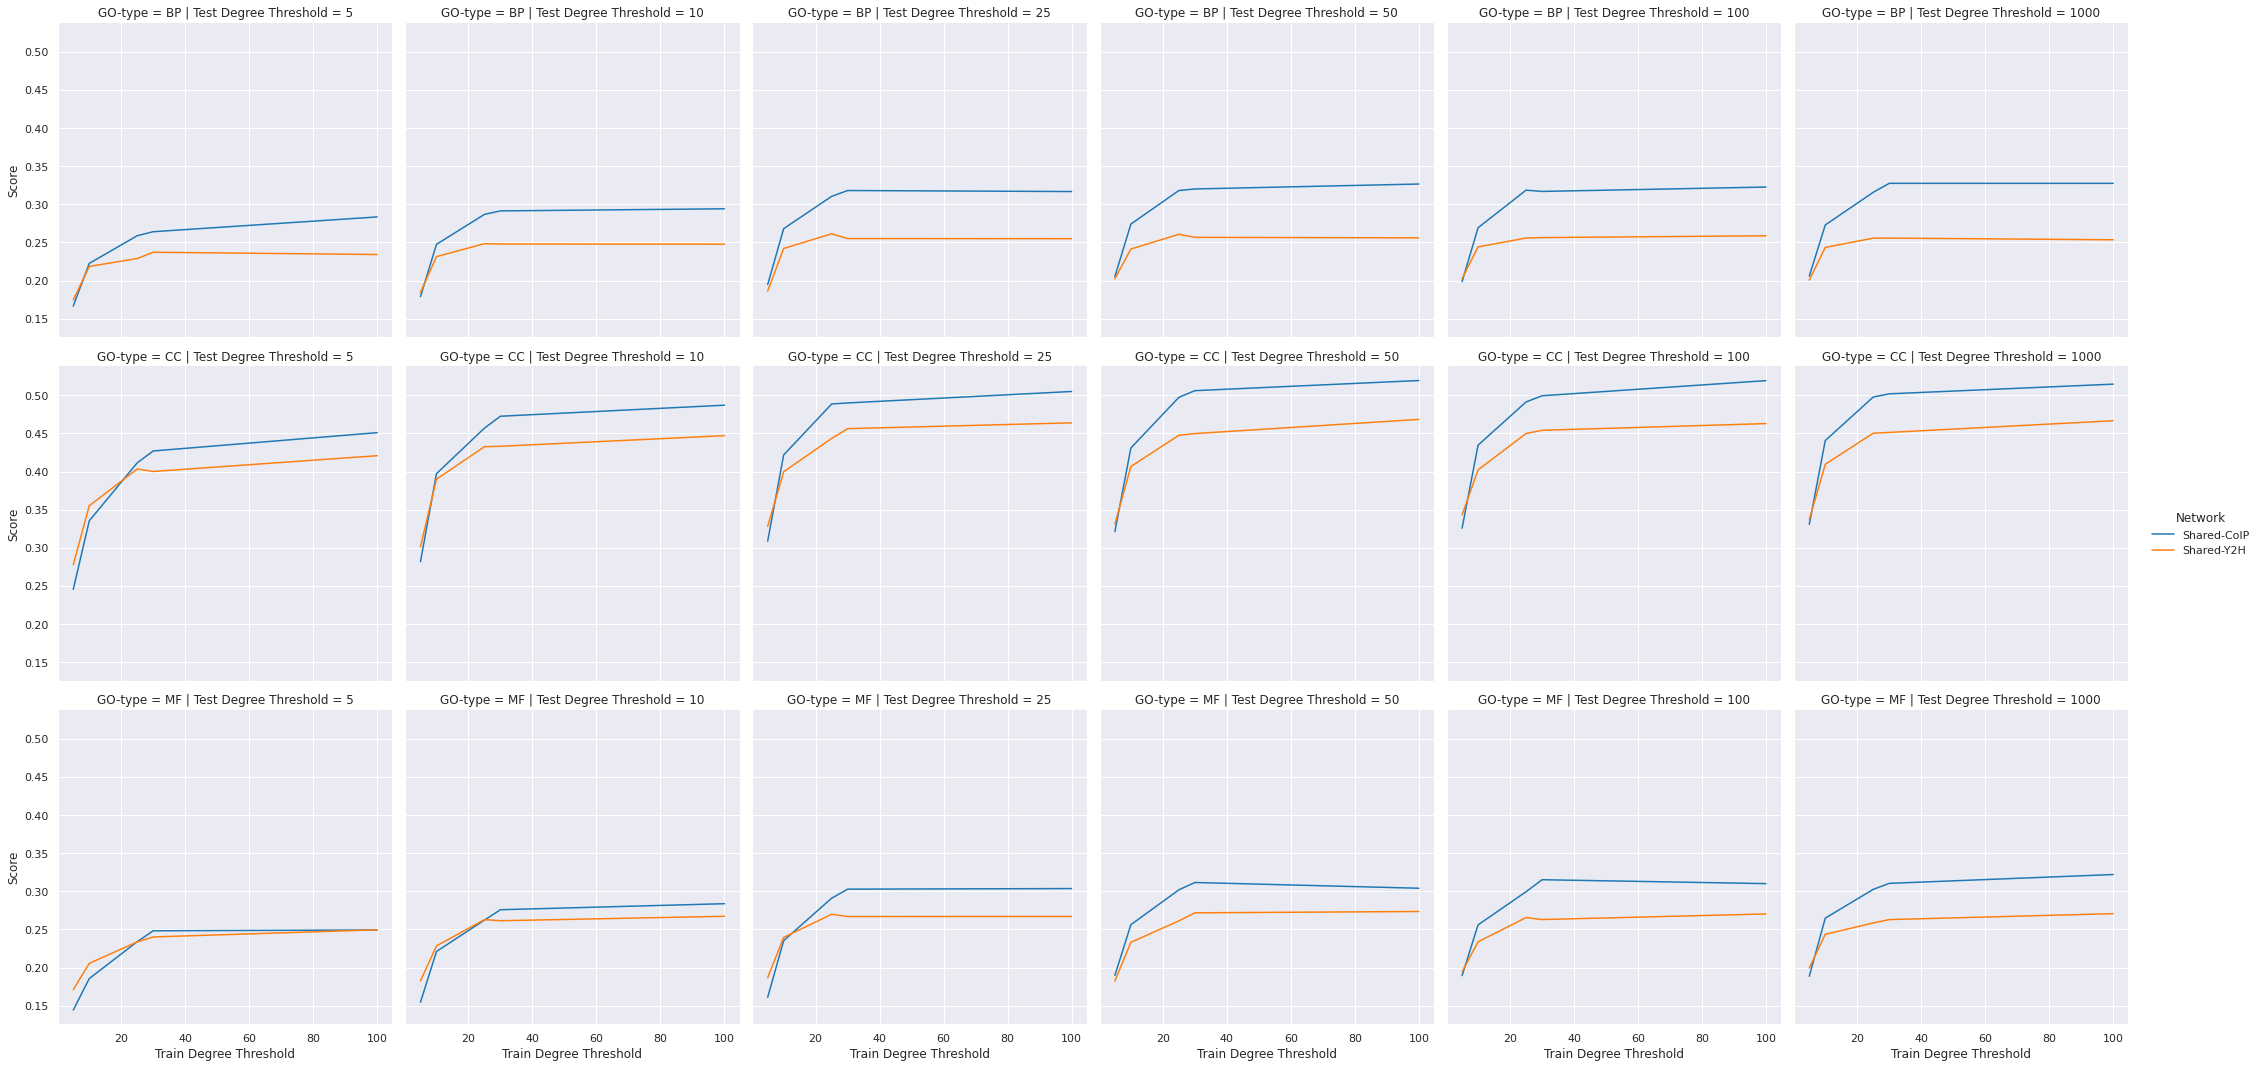

In [39]:
df = pd.read_csv("data+results/func_pred_degree_analysis.tsv", sep = "\t")
df = df.drop(["Folds"], axis = 1)
df = df.groupby(["Test Degree Threshold", "Train Degree Threshold", "Network", "GO-type", "Metric"], as_index = False).mean()
metric = "F1-max"
print(df)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="tab10")

sns.relplot(data = df[(df["Metric"] == metric) & (df["Train Degree Threshold"] <= 100)], 
            x="Train Degree Threshold", 
            y="Score", 
            col="Test Degree Threshold", 
            row="GO-type", 
            hue="Network", 
            ci = False,
            palette="tab10",
            kind = "line")

plt.savefig(f"diagrams/{metric}-degree.png", dpi = 300)

# <span style="color:red">5-fold Cross-validation on the STRING AND HuRI Networks using `L3+MAJORITY VOTE` </span> height=

In [49]:
def l3_mat(A):
    """
    Converts the Adjacency matrix into L3 matrix
    """
    n, _ = A.shape
    d_sq = np.sqrt(A @ np.ones((n, 1)))
    # Small positive when the rows are 0
    d_sq = np.where(d_sq > 0, d_sq, 0.01)
    M    = (A / d_sq) / d_sq.T
    return A @ M @ A

# Generate the L3 MATRICES
yL3 = l3_mat(yA)
cL3 = l3_mat(cA)


In [53]:
test_degree_thresholds = [5, 10, 25, 50, 100, 1000]
train_degree_thresholds = [5, 10, 25, 30, 100, 1000]
results           = [] # Tuple should be (degree_threshold, network, go, metric, fold, score)

ks = [5, 15, 50, 150]

for net, netname in [(yL3, "Shared-Y2H"), (cL3, "Shared-CoIP")]:
    print(f"Using Network {netname}...")
    print("Constructing Degree matrix...")
    n, _      = net.shape 
    degrees   = net @ np.ones((n,1)).flatten()
    for k in ks:
        print(f"Using k-value: {k}")
        for kfold, kfold_metric, conf in [ (kfoldcv, "Accuracy", False),
                                   (kfoldcv_with_pr, "F1-max", True)
                                     ]:
            print(f"\t Using Metric {kfold_metric}...")
            print(f"\t Constructing Predictor...")
            predictor = create_predictor(net, is_wt = True, k = k, confidence = conf)

            for te_deg in test_degree_thresholds:
                for tr_deg in train_degree_thresholds:
                    print(f"\t\t Degree thresholds: {te_deg}, {tr_deg}")
                    thres_f_train = lambda x: degrees[x] <= tr_deg
                    thres_f_test  = lambda x: degrees[x] <= te_deg
                    for go, go_name in [(pid_F, "MF"),
                                   (pid_P, "BP"),
                                   (pid_C, "CC")]:
                        print(f"\t\t\tGO label : {go_name}")
                        res     = kfold(5,
                                    go,
                                    predictor,
                                   filter_f_train = thres_f_train,
                                   filter_f_test = thres_f_test)
                        results.append((te_deg, tr_deg, netname, go_name, kfold_metric, k, np.average(res), np.std(res)))

Using Network Shared-Y2H...
Constructing Degree matrix...
Using k-value: 5
	 Using Metric Accuracy...
	 Constructing Predictor...
		 Degree thresholds: 5, 5
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 5, 10
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 5, 25
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 5, 30
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 5, 100
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 5, 1000
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 10, 5
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 10, 10
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 10, 25
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 10, 30
			GO label : MF
			GO label : BP
			GO label : CC
		 Degree thresholds: 10, 100
			GO label : MF
			GO label : BP
			GO label

In [54]:
import pandas as pd
df = pd.DataFrame(results, columns = ["Test Degree Threshold", "Train Degree Threshold", "Network", "GO-type", "Metric", "k", "Score-Avg", "Score-Std"])
df.to_csv("data+results/func_pred_degree_analysis_l3.tsv", sep = "\t", index = None)
df

,Test Degree Threshold,Train Degree Threshold,Network,GO-type,Metric,k,Score-Avg,Score-Std
0,5,5,Shared-Y2H,MF,Accuracy,5,0.035464,0.016891
1,5,5,Shared-Y2H,BP,Accuracy,5,0.059745,0.013658
2,5,5,Shared-Y2H,CC,Accuracy,5,0.076322,0.029747
3,5,10,Shared-Y2H,MF,Accuracy,5,0.066461,0.011046
4,5,10,Shared-Y2H,BP,Accuracy,5,0.085771,0.034263
...,...,...,...,...,...,...,...,...
1723,1000,100,Shared-CoIP,BP,F1-max,150,0.305574,0.010983
1724,1000,100,Shared-CoIP,CC,F1-max,150,0.524496,0.020360
1725,1000,1000,Shared-CoIP,MF,F1-max,150,0.345437,0.015297
1726,1000,1000,Shared-CoIP,BP,F1-max,150,0.334620,0.012333


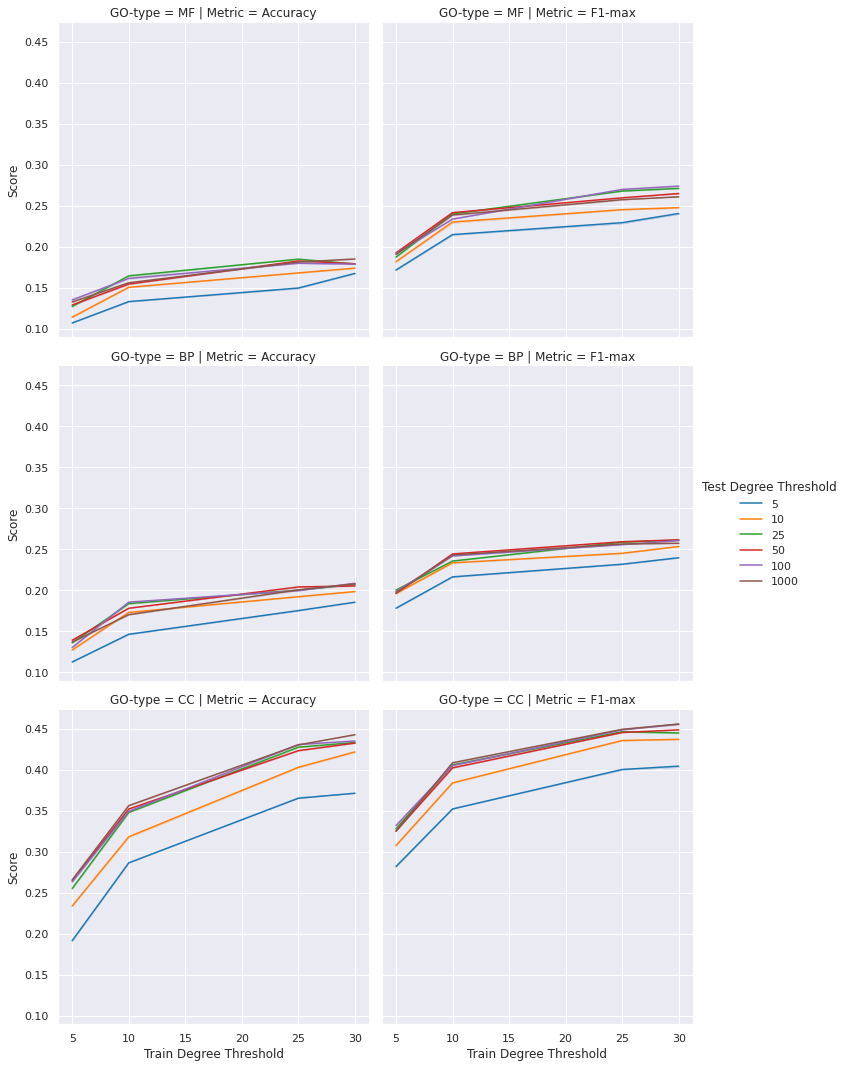

In [53]:
import seaborn as sns
sns.set_theme(style="darkgrid", palette = "tab10")

sns.relplot(data = df[(df["Network"] == "Shared-Y2H") & (df["Train Degree Threshold"] < 100)].drop(["Network"], axis = 1), 
            x="Train Degree Threshold", 
            y="Score", 
            hue="Test Degree Threshold", 
            row="GO-type", 
            col="Metric",
            palette = "tab10",
            ci = False,
            kind = "line")